### Synopsis
This code plots the g2 value at the delay point closest to $\Delta$t= 0.1 s as a function of temperature, for all sample conditions.   
Need to run the analysis code first to generate the `checkpoint.pickle` file that contains the averaged g2s.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.ticker as ticker

import itertools
marker = itertools.cycle(('+', 's', '*')) 


### Loading data from `.pickle` file

In [2]:

with open('checkpoint.pickle', 'rb') as f:  # 'rb' for binary read mode
    avg_H02 = pickle.load(f)  # Load the object from the file
    avg_H04 = pickle.load(f)
    avg_H06 = pickle.load(f)
    t_el = pickle.load(f)
    ql_dyn = pickle.load(f)


### Initializing fonts in `Matplotlib`

In [3]:
plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['font.sans-serif'] = 'Helvetica'   # not installed on tanzanite
# plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 6
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"

 ### Find the delay point closest to $\Delta$t=0.1 s

In [4]:
print(t_el)
target_idx = np.argmin(np.abs(t_el - 0.1))
print(target_idx, t_el[target_idx], 'second')

[1.99999995e-05 3.99999990e-05 5.99999985e-05 7.99999980e-05
 9.99999975e-05 1.19999997e-04 1.39999996e-04 1.59999996e-04
 1.99999995e-04 2.39999994e-04 2.79999993e-04 3.19999992e-04
 3.99999990e-04 4.79999988e-04 5.59999986e-04 6.39999984e-04
 7.99999980e-04 9.59999976e-04 1.11999997e-03 1.27999997e-03
 1.59999996e-03 1.91999995e-03 2.23999994e-03 2.55999994e-03
 3.19999992e-03 3.83999990e-03 4.47999989e-03 5.11999987e-03
 6.39999984e-03 7.67999981e-03 8.95999977e-03 1.02399997e-02
 1.27999997e-02 1.53599996e-02 1.79199995e-02 2.04799995e-02
 2.55999994e-02 3.07199992e-02 3.58399991e-02 4.09599990e-02
 5.11999987e-02 6.14399984e-02 7.16799982e-02 8.19199979e-02
 1.02399997e-01 1.22879997e-01 1.43359996e-01 1.63839996e-01
 2.04799995e-01 2.45759994e-01 2.86719993e-01 3.27679992e-01
 4.09599990e-01 4.91519988e-01 5.73439986e-01 6.55359983e-01
 8.19199979e-01 9.83039975e-01 1.14687997e+00 1.31071997e+00
 1.63839996e+00]
44 0.10239999741315842 second


### Extract the g2 value for $\Delta$t=0.1 s from the averaged files

In [5]:
def get_temperature_and_g2(avg_data_list, target_idx=44, g2_idx=0):
    xy = []
    for avg_dict in avg_data_list:
        t = np.nanmean(avg_dict['temperature'])
        g2 = avg_dict['g2'][target_idx][g2_idx]
        g2_err = avg_dict['g2_err'][target_idx][g2_idx]
        xy.append((t, g2, g2_err))
    xy = np.array(xy)
    return xy

### Figure rendering

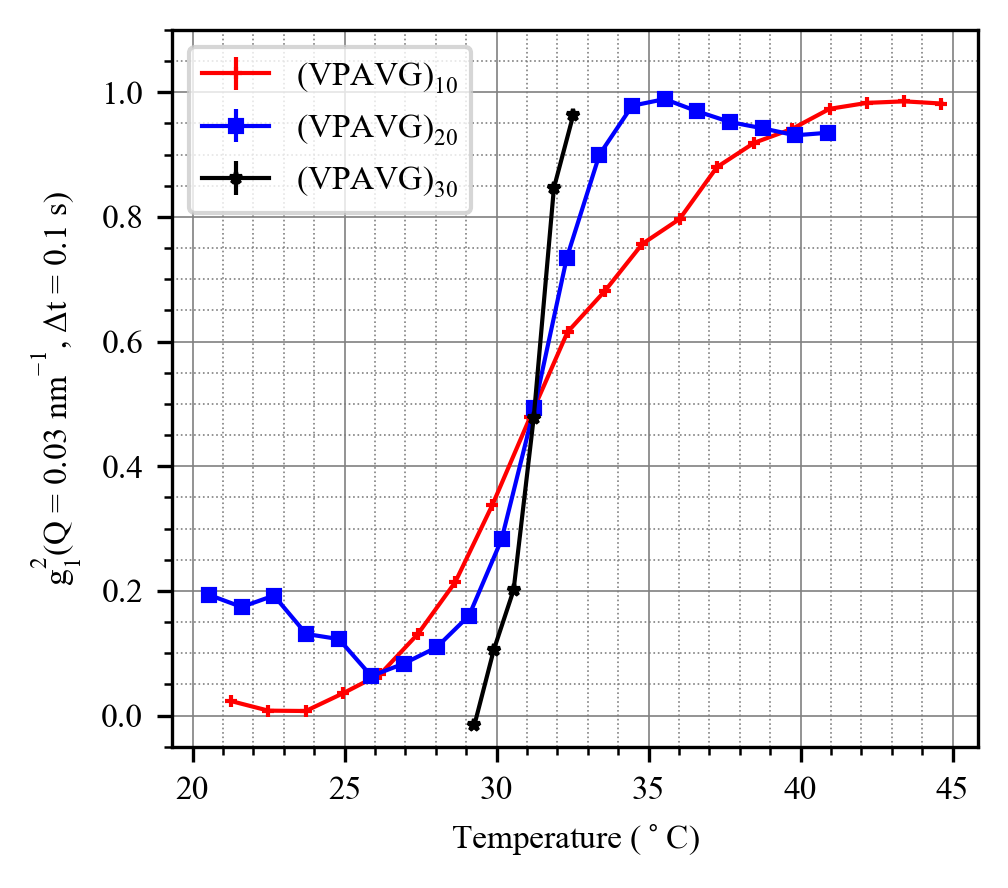

In [7]:

with open('checkpoint.pickle', 'rb') as f:  
    avg_H02 = pickle.load(f)  
    avg_H04 = pickle.load(f)
    avg_H06 = pickle.load(f)
    t_el = pickle.load(f)
    ql_dyn = pickle.load(f)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"

def get_temperature_and_g2(avg_data_list, target_idx=44, g2_idx=0):
    xy = []
    for avg_dict in avg_data_list:
        t = np.nanmean(avg_dict['temperature'])
        g2 = avg_dict['g2'][target_idx][g2_idx]
        g2_err = avg_dict['g2_err'][target_idx][g2_idx]
        xy.append((t, g2, g2_err))
    xy = np.array(xy)
    return xy

fig, ax = plt.subplots(1, 1, figsize=(3.4, 3))
labels = ['(VPAVG)$\mathdefault{_{10}}$', '(VPAVG)$\mathdefault{_{20}}$', '(VPAVG)$\mathdefault{_{30}}$']
marker = itertools.cycle(('+', 's', '*')) 
colors = ['red', 'blue', 'black']

for n, avg_data_list in enumerate([avg_H02, avg_H04, avg_H06]):
    t_g2 = get_temperature_and_g2(avg_data_list)
    
    # Remove baseline and normalize g2 for H02
    if labels[n] == '(VPAVG)$\mathdefault{_{10}}$':
        t_g2[:, 1] = (t_g2[:, 1]-1)/0.19

    # Remove baseline and normalize g2 for H04
    if labels[n] == '(VPAVG)$\mathdefault{_{20}}$':
        t_g2[:, 1] = (t_g2[:, 1]-1)/0.195

    # Remove baseline and normalize g2 for H04
    # Also removing H06 data before x-axis value 27 due to insufficient statistics
    if labels[n] == '(VPAVG)$\mathdefault{_{30}}$':  
        t_g2 = t_g2[t_g2[:, 0] >= 27]
        t_g2[:, 1] = (t_g2[:, 1]-1)/0.135
        t_g2 = t_g2[3:]
    ax.errorbar(t_g2[:, 0], t_g2[:, 1], yerr=t_g2[:, 2], marker=next(marker), \
                label=labels[n], ms=3, lw=1, color=colors[n])

ax.set_xlabel('Temperature ($^\circ$C)', fontname="Times New Roman")
ax.set_ylabel('$\mathdefault{g_1^2}$(Q = 0.03 nm$\mathdefault{^{-1}}$, $\mathdefault{Δt}$ = 0.1 s)', 
              fontname="Times New Roman")
ax.set_ylim(-0.05, 1.1)  # Adjusted y-axis range for the full figure
plt.legend()

# Adjusted spacing
plt.subplots_adjust(wspace=0)
plt.tight_layout()

# Set minor ticks
ax.grid(which='major', linestyle='-', linewidth='0.4', color='gray')
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

plt.savefig('Del_g2_t0p1.pdf')
plt.show()

